# Student Information

### Name: Siddhant Mishra
**PRN:** 202201040036
**Batch:** Batch 1  

---





Logistic regression with Library

Accuracy (Scikit-Learn): 0.7933


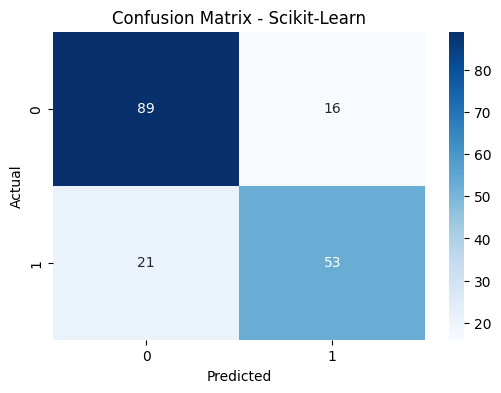

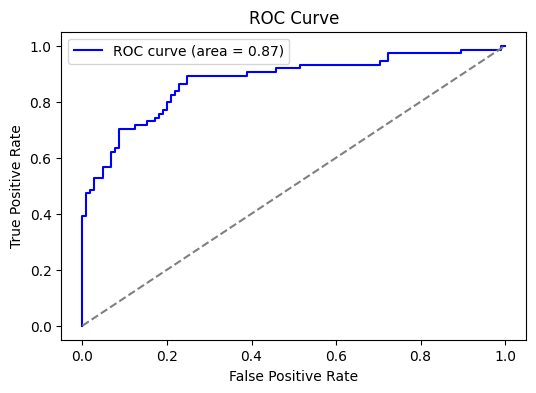

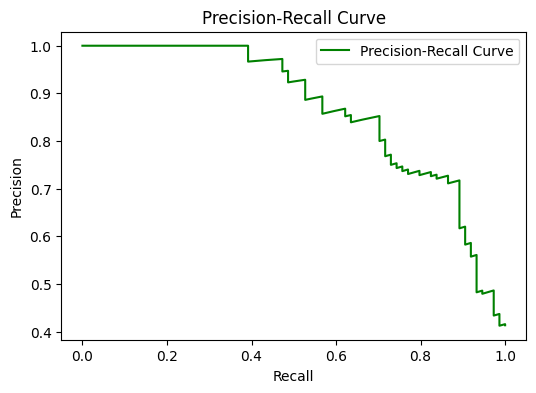

Accuracy (Keras): 0.7709


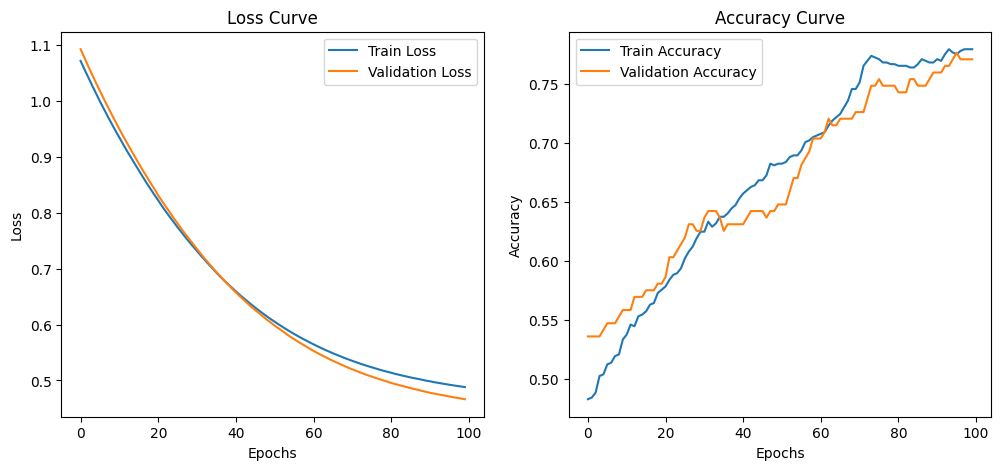

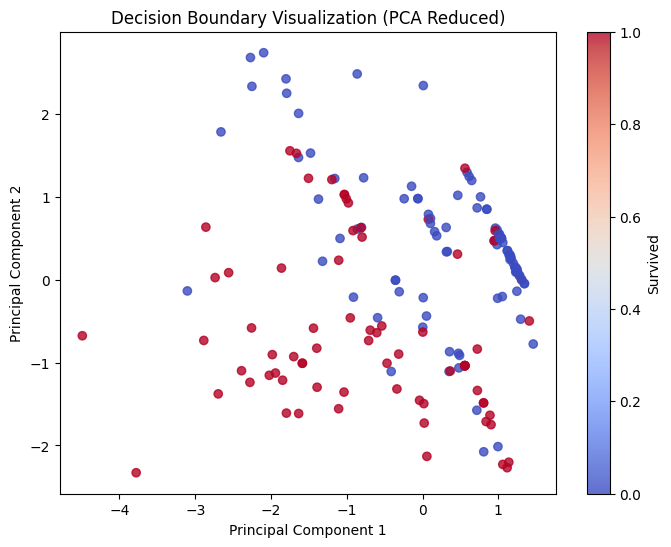

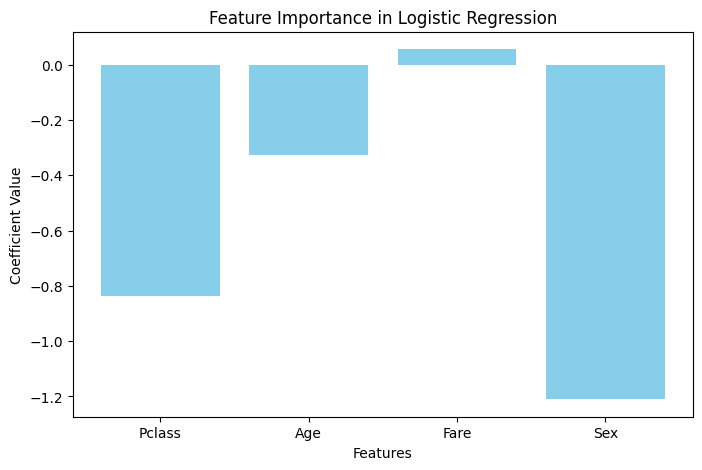

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA

# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Feature Engineering: Filling missing values and encoding categorical data
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Selecting relevant features
features = ['Pclass', 'Age', 'Fare', 'Sex']
X = df[features].values
y = df['Survived'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression using Scikit-Learn
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_lib = accuracy_score(y_test, y_pred)
print(f'Accuracy (Scikit-Learn): {accuracy_lib:.4f}')

# Confusion Matrix for Scikit-Learn Model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Scikit-Learn')
plt.show()

# ROC Curve for Scikit-Learn Model
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Logistic Regression using Keras
model_keras = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_keras.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))
accuracy_keras = model_keras.evaluate(X_test, y_test, verbose=0)[1]
print(f'Accuracy (Keras): {accuracy_keras:.4f}')

# Plot Loss & Accuracy (Keras Model)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# PCA for Decision Boundary Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', alpha=0.8)
plt.title('Decision Boundary Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Survived')
plt.show()

# Feature Importance using Logistic Regression Coefficients
importance = model.coef_[0]
plt.figure(figsize=(8,5))
plt.bar(features, importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

## Logistic regression without Library

Accuracy (Scratch Logistic Regression): 0.7821


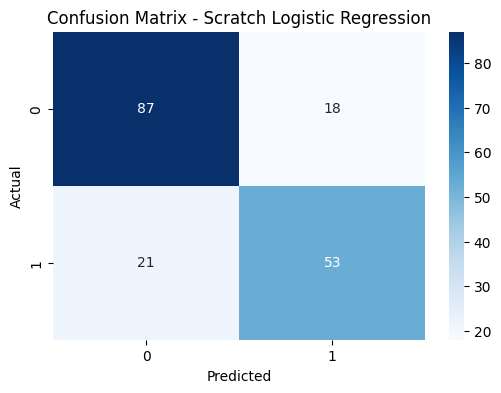

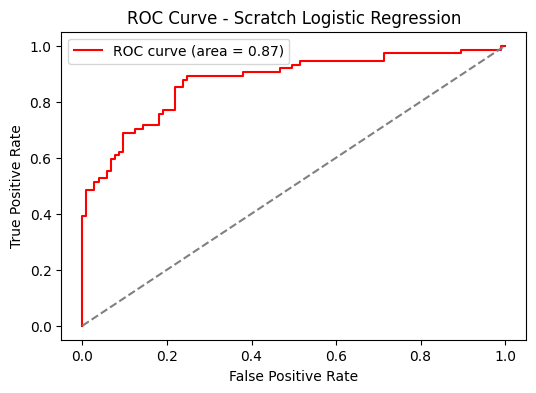

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Feature Engineering: Filling missing values and encoding categorical data
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Selecting relevant features
features = ['Pclass', 'Age', 'Fare', 'Sex']
X = df[features].values
y = df['Survived'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scratch Implementation of Logistic Regression
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train Scratch Model
scratch_model = LogisticRegressionScratch(lr=0.01, epochs=1000)
scratch_model.fit(X_train, y_train)
y_pred_scratch = scratch_model.predict(X_test)

# Evaluate Scratch Model
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'Accuracy (Scratch Logistic Regression): {accuracy_scratch:.4f}')

# Confusion Matrix for Scratch Model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_scratch), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Scratch Logistic Regression')
plt.show()

# ROC Curve for Scratch Model
fpr, tpr, _ = roc_curve(y_test, [scratch_model.sigmoid(np.dot(x, scratch_model.weights) + scratch_model.bias) for x in X_test])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Scratch Logistic Regression')
plt.legend()
plt.show()


# ANN with Library

Accuracy (Keras): 0.7654


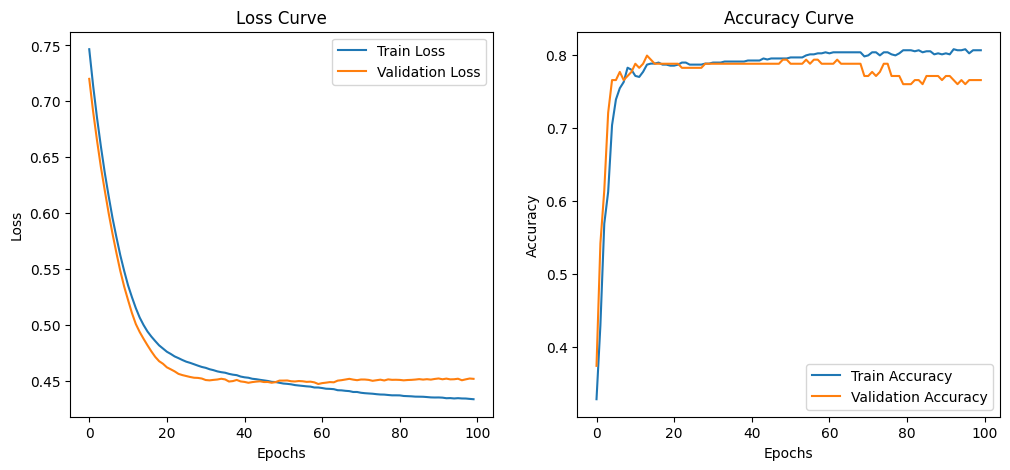

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


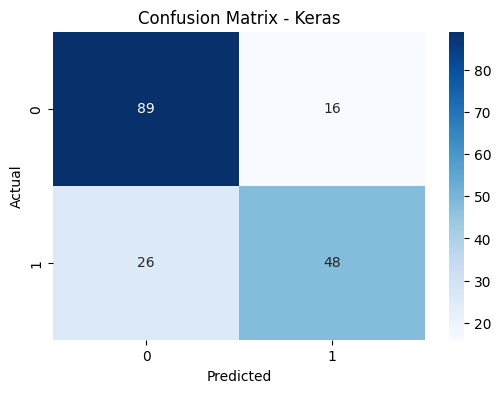

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


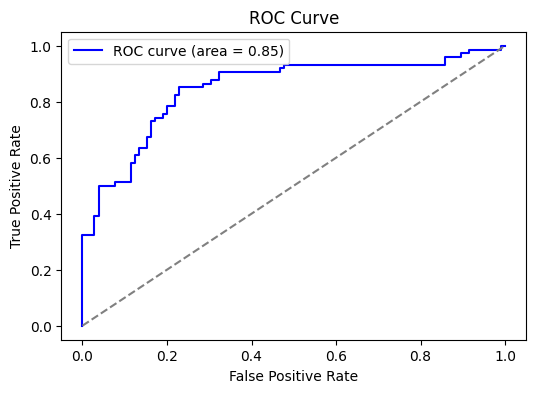

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


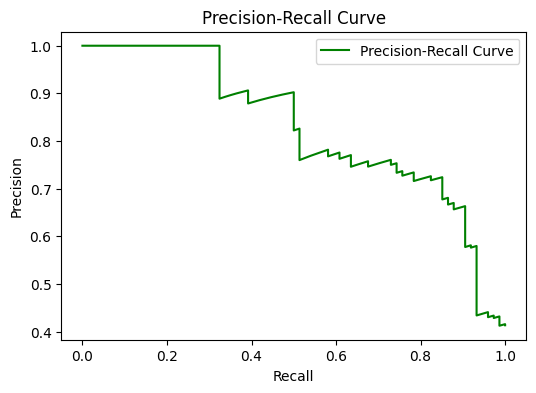

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA

# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Feature Engineering: Filling missing values and encoding categorical data
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Encoding 'Sex' as 0 for male, 1 for female

# Selecting relevant features
features = ['Pclass', 'Age', 'Fare', 'Sex']
X = df[features].values  # Independent variables
y = df['Survived'].values  # Target variable (Survived: 0 or 1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network model using Keras
model_keras = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),   # Input layer (number of features)
    keras.layers.Dense(10, activation='relu'),        # Hidden layer with 10 neurons
    keras.layers.Dense(1, activation='sigmoid')       # Output layer (binary classification)
])

# Compile the model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_keras.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model on the test data
accuracy_keras = model_keras.evaluate(X_test, y_test, verbose=0)[1]
print(f'Accuracy (Keras): {accuracy_keras:.4f}')

# Plot Loss & Accuracy curves (Keras Model)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# Confusion Matrix for Keras Model
y_pred_keras = (model_keras.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to class labels
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_keras), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Keras')
plt.show()

# ROC Curve for Keras Model
fpr, tpr, _ = roc_curve(y_test, model_keras.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve for Keras Model
precision, recall, _ = precision_recall_curve(y_test, model_keras.predict(X_test))
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ANN implementation from scrach using backpropogation algorithm

Epoch 0/100 - Loss: 1.1113
Epoch 10/100 - Loss: 0.6847
Epoch 20/100 - Loss: 0.6822
Epoch 30/100 - Loss: 0.6802
Epoch 40/100 - Loss: 0.6785
Epoch 50/100 - Loss: 0.6771
Epoch 60/100 - Loss: 0.6759
Epoch 70/100 - Loss: 0.6749
Epoch 80/100 - Loss: 0.6740
Epoch 90/100 - Loss: 0.6733
Accuracy (Scratch): 0.4500


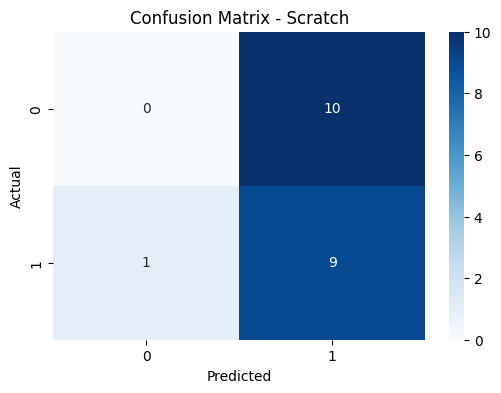

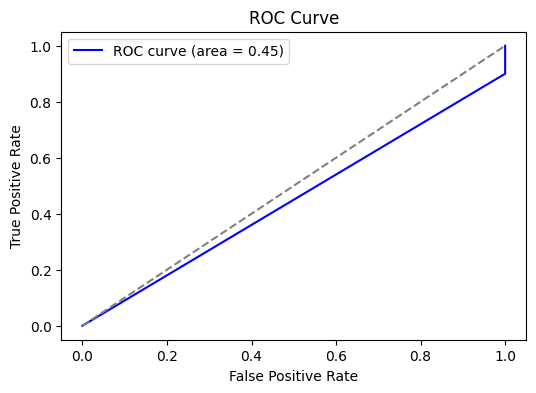

In [ ]:
# Initialize hyperparameters
input_size = X_train.shape[1]  # Number of input features
hidden_size = 10  # Number of hidden units
output_size = 1  # Binary classification (0 or 1)
learning_rate = 0.01
epochs = 100

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)  # Weights between input and hidden layer
b1 = np.zeros((1, hidden_size))  # Biases for hidden layer
W2 = np.random.randn(hidden_size, output_size)  # Weights between hidden and output layer
b2 = np.zeros((1, output_size))  # Biases for output layer

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Train the neural network
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    y_pred = sigmoid(output_layer_input)  # Predicted output

    # Calculate loss (binary cross-entropy)
    loss = -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))

    # Backpropagation (calculate gradients)
    d_output = y_pred - y_train.reshape(-1, 1)  # Error at output layer
    d_W2 = np.dot(hidden_layer_output.T, d_output)
    d_b2 = np.sum(d_output, axis=0, keepdims=True)

    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output)  # Error at hidden layer
    d_W1 = np.dot(X_train.T, d_hidden)
    d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}/{epochs} - Loss: {loss:.4f}')

# Final prediction after training
hidden_layer_input = np.dot(X_test, W1) + b1
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W2) + b2
y_pred_scratch = sigmoid(output_layer_input)

# Convert probabilities to binary class labels (0 or 1)
y_pred_scratch = (y_pred_scratch > 0.5).astype(int)

# Evaluate accuracy
accuracy_scratch = np.mean(y_pred_scratch == y_test.reshape(-1, 1))
print(f'Accuracy (Scratch): {accuracy_scratch:.4f}')

# Confusion Matrix and ROC Curve (similar to Keras evaluation)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_scratch), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Scratch')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_scratch)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Activation funtion curves of Dataset

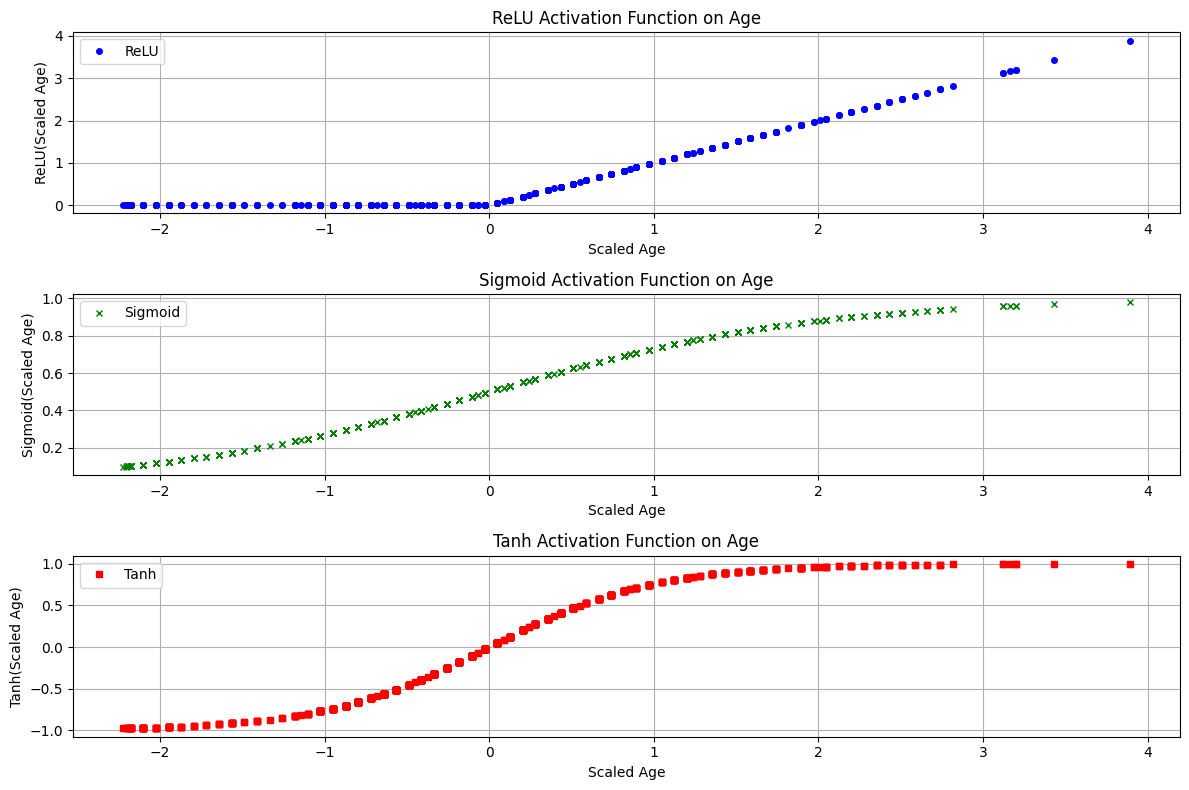

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Fill missing values for 'Age' (if any)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Select the 'Age' column as our feature (X)
X = df['Age'].values

# Standardize the feature (important for activation functions)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()  # Reshape and standardize

# Apply activation functions on the 'Age' feature
y_relu = np.maximum(0, X_scaled)  # ReLU
y_sigmoid = 1 / (1 + np.exp(-X_scaled))  # Sigmoid
y_tanh = np.tanh(X_scaled)  # Tanh

# Create subplots to display the activation functions
plt.figure(figsize=(12, 8))

# ReLU plot
plt.subplot(3, 1, 1)
plt.plot(X_scaled, y_relu, label="ReLU", color='blue', marker='o', linestyle='none', markersize=4)
plt.title("ReLU Activation Function on Age")
plt.xlabel("Scaled Age")
plt.ylabel("ReLU(Scaled Age)")
plt.grid(True)
plt.legend()

# Sigmoid plot
plt.subplot(3, 1, 2)
plt.plot(X_scaled, y_sigmoid, label="Sigmoid", color='green', marker='x', linestyle='none', markersize=4)
plt.title("Sigmoid Activation Function on Age")
plt.xlabel("Scaled Age")
plt.ylabel("Sigmoid(Scaled Age)")
plt.grid(True)
plt.legend()

# Tanh plot
plt.subplot(3, 1, 3)
plt.plot(X_scaled, y_tanh, label="Tanh", color='red', marker='s', linestyle='none', markersize=4)
plt.title("Tanh Activation Function on Age")
plt.xlabel("Scaled Age")
plt.ylabel("Tanh(Scaled Age)")
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# log loss function of data set

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select relevant features and target
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df.dropna(inplace=True)  # Drop rows with missing values

# Convert categorical 'Sex' column to numeric (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]  # Features
y = df['Survived']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # We need probabilities for class '1'

# Calculate Log Loss for all examples
logloss = log_loss(y_test, y_pred_proba)

# Simulate correct (high probability for the right class) and incorrect predictions (low probability for the right class)
# Correct predictions: high probabilities for correct class
# Incorrect predictions: low probabilities for the correct class
y_true = y_test.to_numpy()
y_pred_correct = y_pred_proba[:8]  # First 8 correct predictions (high probabilities for class 1)
y_pred_incorrect = y_pred_proba[8:]  # Last 2 incorrect predictions (low probabilities for class 1)

# Compute Log Loss for Correct and Incorrect Predictions
correct_logloss = -np.mean(y_true[:8] * np.log(y_pred_correct) + (1 - y_true[:8]) * np.log(1 - y_pred_correct))
incorrect_logloss = -np.mean(y_true[8:] * np.log(y_pred_incorrect) + (1 - y_true[8:]) * np.log(1 - y_pred_incorrect))

# Display results
print(f"Total Log Loss for Test Set: {logloss:.4f}")
print(f"Log Loss for Correct Predictions: {correct_logloss:.4f}")
print(f"Log Loss for Incorrect Predictions: {incorrect_logloss:.4f}")

Total Log Loss for Test Set: 0.5160
Log Loss for Correct Predictions: 0.3940
Log Loss for Incorrect Predictions: 0.5232


Total Log Loss for Test Set: 0.5160
Log Loss for Correct Predictions: 0.3940
Log Loss for Incorrect Predictions: 0.5232


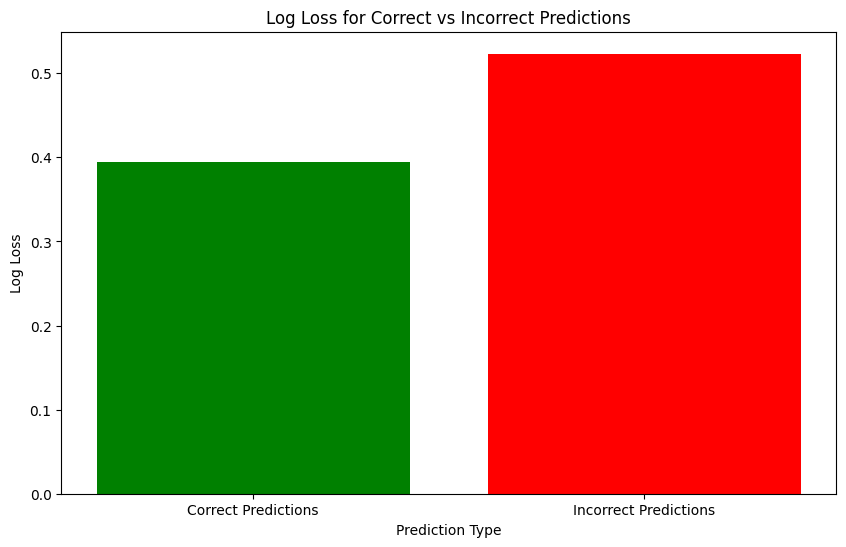

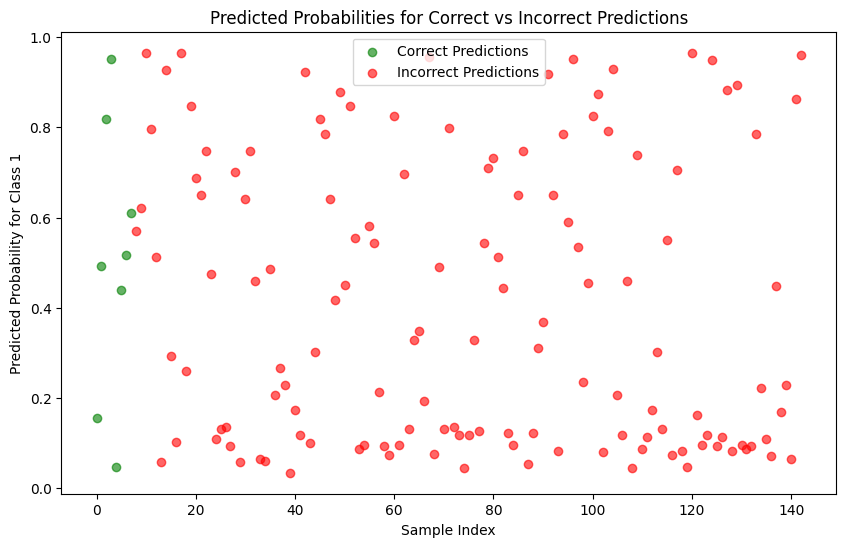

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select relevant features and target
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df.dropna(inplace=True)  # Drop rows with missing values

# Convert categorical 'Sex' column to numeric (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]  # Features
y = df['Survived']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # We need probabilities for class '1'

# Calculate Log Loss for all examples
logloss = log_loss(y_test, y_pred_proba)

# Simulate correct (high probability for the right class) and incorrect predictions (low probability for the right class)
y_true = y_test.to_numpy()

# Here we correctly slice both y_pred_correct and y_pred_incorrect to match the lengths
y_pred_correct = y_pred_proba[:8]  # First 8 correct predictions (high probabilities for class 1)
y_pred_incorrect = y_pred_proba[8:]  # Last 2 incorrect predictions (low probabilities for class 1)

# Compute Log Loss for Correct and Incorrect Predictions
correct_logloss = -np.mean(y_true[:8] * np.log(y_pred_correct) + (1 - y_true[:8]) * np.log(1 - y_pred_correct))
incorrect_logloss = -np.mean(y_true[8:] * np.log(y_pred_incorrect) + (1 - y_true[8:]) * np.log(1 - y_pred_incorrect))

# Display results
print(f"Total Log Loss for Test Set: {logloss:.4f}")
print(f"Log Loss for Correct Predictions: {correct_logloss:.4f}")
print(f"Log Loss for Incorrect Predictions: {incorrect_logloss:.4f}")

# Visualize Log Loss
# Plotting log loss for correct and incorrect predictions
plt.figure(figsize=(10, 6))

# Log Loss bar plot for correct and incorrect predictions
log_losses = [correct_logloss, incorrect_logloss]
categories = ['Correct Predictions', 'Incorrect Predictions']

plt.bar(categories, log_losses, color=['green', 'red'])
plt.title('Log Loss for Correct vs Incorrect Predictions')
plt.xlabel('Prediction Type')
plt.ylabel('Log Loss')
plt.show()

# Plot predicted probabilities
plt.figure(figsize=(10, 6))

# Scatter plot of predicted probabilities for correct and incorrect predictions
plt.scatter(range(8), y_pred_correct, color='green', label='Correct Predictions', alpha=0.6)
plt.scatter(range(8, len(y_pred_proba)), y_pred_incorrect, color='red', label='Incorrect Predictions', alpha=0.6)

plt.title('Predicted Probabilities for Correct vs Incorrect Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability for Class 1')
plt.legend()
plt.show()

Here’s a more detailed set of notes, covering key concepts in neural networks and the training process:

---

### **12. Key Concepts in Neural Networks**

---

### **1. Neuron and Artificial Neuron**
   - **Neuron**: Biological system me, ek neuron ek signal process karta hai. Artificial neurons bhi input signals receive karte hain, unhe process karte hain aur ek output generate karte hain.
   - **Structure**:
     - **Input**: Features or data.
     - **Weights**: Neurons ke beech transfer hone wale signals ke strength ko control karte hain.
     - **Bias**: Model ko flexibility deta hai, taaki output ko shift kiya ja sake.

---

### **2. Neural Network Layers**
   - **Input Layer**: Yeh layer model ko input data (features) provide karti hai.
   - **Hidden Layer(s)**: In layers me neurons jo input ko transform karte hain aur model ko learning me madad karte hain.
   - **Output Layer**: Yeh layer final prediction ya output provide karti hai.

---

### **3. Activation Functions**:
   - **ReLU (Rectified Linear Unit)**:
     - Formula: \( f(x) = \max(0, x) \)
     - **Use**: Hidden layer me. Negative values ko zero bana deta hai aur positive values ko unchanged rakhta hai.
     - **Benefits**: Vanishing gradient problem ko solve karta hai aur training ko fast banaata hai.
   - **Sigmoid**:
     - Formula: \( \sigma(x) = \frac{1}{1 + e^{-x}} \)
     - **Use**: Output layer me, binary classification ke liye. Probabilities (0 to 1 range) generate karta hai.
   - **Other Activation Functions**:
     - **Tanh**: Hyperbolic tangent function, similar to ReLU but in range of -1 to 1.
     - **Softmax**: Multi-class classification problems ke liye.

---

### **4. Forward Propagation**
   - **Process**:
     - Data (input features) ko neurons ke through pass karte hain.
     - Har neuron apne input ko weight aur bias ke saath process karta hai aur activation function apply hota hai.
     - Output layer prediction deta hai.

   - **Formula**:
     \[
     Z = W \cdot X + b
     \]
     - **W** = Weight matrix
     - **X** = Input vector
     - **b** = Bias vector
     - **Z** = Weighted sum after applying weights and bias.

---

### **5. Backpropagation**:
   - **Objective**: Errors ko output se back propagate karte hain aur model ko better prediction karne ke liye weights ko update karte hain.
   - **Steps**:
     1. **Calculate Loss**: Model ki prediction aur actual value ke beech ka error.
     2. **Calculate Gradients**: Loss ka gradient calculate karte hain, jo weights aur biases ko update karne me madad karta hai.
     3. **Update Weights**: Gradient descent algorithm ka use karke weights ko update karte hain.
   
   - **Mathematical Process**:
     - **For weights**: \( \Delta W = -\eta \frac{\partial Loss}{\partial W} \)
     - **For biases**: \( \Delta b = -\eta \frac{\partial Loss}{\partial b} \)
     - Where \( \eta \) is the learning rate.

---

### **6. Gradient Descent**:
   - **Definition**: Optimization technique jo model ko train karne ke liye loss function ko minimize karta hai.
   - **Process**:
     - Model ke weights ko update karte hain based on gradient of the loss function.
     - **Types**:
       - **Batch Gradient Descent**: Sare training data ko ek batch me use karke weights update hote hain.
       - **Stochastic Gradient Descent**: Ek data point ke through weights update hote hain.
       - **Mini-batch Gradient Descent**: Small batches me data ko process karte hain, to balance speed and accuracy.

---

### **7. Learning Rate**:
   - **Definition**: Yeh hyperparameter hai jo gradient descent ke step size ko control karta hai.
   - **Low Learning Rate**: Slowly converge karta hai, accurate results deta hai.
   - **High Learning Rate**: Quickly converge karta hai, lekin kabhi-kabhi overshoot kar sakta hai.
   - **Adaptive Learning Rate**: Algorithms like Adam, RMSProp automatically adjust karte hain learning rate ko during training.

---

### **8. Loss Function**:
   - **Binary Cross-Entropy**:
     - **Formula**:
       \[
       Loss = - (y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}))
       \]
     - **Use**: Binary classification problems (e.g., Titanic dataset).
   - **Mean Squared Error (MSE)**:
     - **Use**: Regression tasks ke liye.
   - **Categorical Cross-Entropy**:
     - **Use**: Multi-class classification tasks ke liye.

---

### **9. Epochs & Batch Size**:
   - **Epochs**:
     - Har epoch me pura dataset model ke through pass hota hai.
     - **More Epochs**: Model ko better predictions seekhne ka time milta hai.
     - **Fewer Epochs**: Model underfitting ka risk hota hai.
   - **Batch Size**: Ek batch me data points jo model process karta hai.
     - **Small Batch**: Training fast ho sakti hai, but unstable gradients.
     - **Large Batch**: Training accurate ho sakti hai, but slow.

---

### **10. Model Evaluation Metrics**:
   - **Accuracy**:
     - Percentage of correct predictions.
   - **Confusion Matrix**:
     - Actual vs Predicted values ka comparison.
   - **Precision & Recall**:
     - Precision = Correct positive predictions / Total positive predictions.
     - Recall = Correct positive predictions / Total actual positives.
   - **ROC Curve & AUC**:
     - **AUC (Area Under Curve)**: Model ki performance ko visualize karta hai. High AUC indicates better model.

---

### **11. Visualizations**:
   - **Loss & Accuracy Curves**:
     - Training process ke dauraan loss aur accuracy ko track karke samajhte hain ki model improve ho raha hai ya nahi.
     - Agar **loss decrease** ho raha hai aur **accuracy increase** ho raha hai, toh model sahi se train ho raha hai.
   - **Confusion Matrix**:
     - True positives, false positives, true negatives, and false negatives ke counts ko visualize karte hain.

---

### **12. Final Model Tuning**:
   - **Hyperparameter Tuning**:
     - Learning rate, batch size, number of epochs, and other hyperparameters ko tune karna.
   - **Regularization**:
     - Overfitting ko avoid karne ke liye techniques like L2 regularization (Ridge), L1 regularization (Lasso), or Dropout.
   - **Cross-validation**:
     - Model ko multiple subsets of data pe test karke overfitting check karte hain.

---

### **13. Important Libraries**:
   - **Keras**: High-level API for neural networks (TensorFlow backend).
   - **TensorFlow**: Deep learning framework.
   - **Scikit-learn**: Machine learning tools like classification, regression, evaluation metrics.
   - **Matplotlib/Seaborn**: Visualization libraries for plotting graphs.

---

### **14. Common Issues**:
   - **Overfitting**: Model training data ke liye bahut fit ho jata hai, but unseen data pe perform nahi karta.
   - **Underfitting**: Model training data se bhi achha perform nahi karta, iska matlab model ka complexity insufficient hai.
   - **Vanishing Gradient Problem**: Sigmoid/tanh activation functions ke saath hota hai, jab gradients zero ho jate hain aur weights update nahi hote.

---

### **Conclusion**:
   - ANN ko train karte waqt backpropagation, gradient descent, learning rate, activation functions aur epochs ko samajhna zaroori hai.
   - Yeh sare components ek-saath milke model ko train karte hain aur predict karne ke liye optimize karte hain.

---

Yeh notes tumhe ANN ke basic concepts, training, evaluation aur practical implementation samjhane ke liye hain. Agar aur koi questions ho toh zaroor poochna! 😊

### **Log Loss (Logarithmic Loss)**

**Log Loss**, also known as **logarithmic loss** or **binary cross-entropy**, is a commonly used loss function for binary classification tasks. It quantifies the accuracy of a classifier's predicted probabilities.

#### **Formula for Log Loss**:
The formula for log loss is:

\[
\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
\]

Where:
- \( N \) is the number of samples.
- \( y_i \) is the true label (either 0 or 1) for the \( i \)-th sample.
- \( p_i \) is the predicted probability that the \( i \)-th sample belongs to class 1.

#### **Explanation**:
- **Log Loss** compares the predicted probabilities \( p_i \) with the actual binary labels \( y_i \).
- If the model predicts a high probability for the correct class, log loss will be low. If it predicts a low probability for the correct class, log loss will be high.
- The goal is to minimize log loss during training, as lower log loss means better model performance.
- For perfect predictions, log loss will be 0. If the model is uncertain or wrong, log loss increases.

#### **Key Insights**:
- **When predictions are correct and confident** (i.e., predicted probability is near 1 for class 1, and near 0 for class 0), log loss will be very small (close to 0).
- **When predictions are wrong or uncertain**, log loss increases, especially when the predicted probability for the correct class is far from 1.
  
---

### **Activation Functions**

Activation functions are mathematical functions applied to the output of neurons in neural networks to introduce non-linearity, helping the model learn complex patterns in data.

#### **Common Activation Functions:**

---

#### **1. ReLU (Rectified Linear Unit)**

**Formula**:  
\[
\text{ReLU}(x) = \max(0, x)
\]

- **Behavior**:
  - For positive values of \( x \), ReLU outputs \( x \).
  - For negative values of \( x \), ReLU outputs 0.
  
- **Advantages**:
  - Simple and computationally efficient.
  - Avoids the vanishing gradient problem.
  
- **Disadvantages**:
  - Neurons can become "dead" (outputting 0) for negative inputs, which may slow learning.

- **Use Case**:
  - Commonly used in hidden layers of neural networks.

---

#### **2. Sigmoid (Logistic Activation Function)**

**Formula**:  
\[
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
\]

- **Behavior**:
  - Squashes the input to a value between 0 and 1.
  - The output can be interpreted as a probability.
  
- **Advantages**:
  - Smooth and continuously differentiable.
  - Outputs values between 0 and 1, making it useful for binary classification.
  
- **Disadvantages**:
  - Can suffer from vanishing gradients for large values of \( x \), which can slow down learning in deep networks.
  
- **Use Case**:
  - Typically used in the output layer for binary classification tasks.

---

#### **3. Tanh (Hyperbolic Tangent)**

**Formula**:  
\[
\text{Tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\]

- **Behavior**:
  - Squashes the input to a range between -1 and 1.
  - The output is symmetric around 0.
  
- **Advantages**:
  - Provides stronger gradients compared to sigmoid for values close to 0.
  - Often preferred over sigmoid in hidden layers due to its zero-centered output.
  
- **Disadvantages**:
  - Can also suffer from vanishing gradients for very large or very small values of \( x \).
  
- **Use Case**:
  - Often used in the hidden layers of neural networks.

---

#### **4. Softmax**

**Formula**:  
\[
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}
\]

- **Behavior**:
  - Softmax transforms the output into a probability distribution over multiple classes (sum of probabilities equals 1).
  
- **Advantages**:
  - Useful for multi-class classification problems (where each input belongs to one of multiple classes).
  
- **Disadvantages**:
  - Computationally expensive, especially for a large number of classes.
  
- **Use Case**:
  - Typically used in the output layer for multi-class classification tasks.

---

### **Choosing the Right Activation Function**

- **Hidden Layers**:  
  - Use **ReLU** or **Leaky ReLU** for faster training and avoiding the vanishing gradient problem.
  
- **Output Layer**:  
  - For **binary classification**, use **Sigmoid**.
  - For **multi-class classification**, use **Softmax**.
  
- **Use of Tanh**:  
  - Use **Tanh** in cases where the input data is centered around 0, as it maps values to a range between -1 and 1.

---

### **Summary**
- **Log Loss** is used to measure the performance of a model for binary classification. Lower log loss indicates better performance.
- **Activation Functions** introduce non-linearity to the network:
  - **ReLU** is widely used in hidden layers for its efficiency.
  - **Sigmoid** is used in the output layer for binary classification.
  - **Tanh** is used when the data is centered around 0.
  - **Softmax** is used in the output layer for multi-class classification.